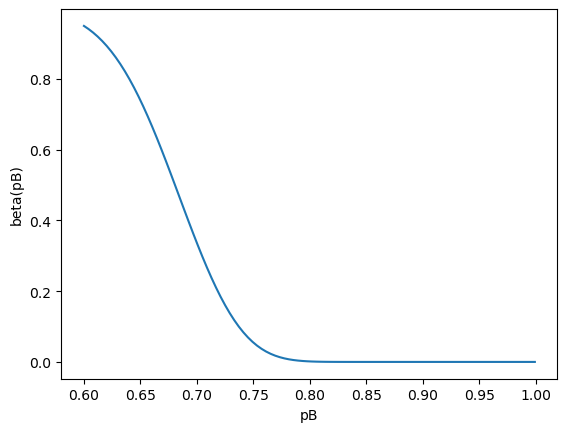

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

alpha = 0.05 # definerer signifikansnivået
n = 100 # Antall observasjoner

zAlpha = norm.ppf(1-alpha) # Finner kvantilen. Merk at funksjonen ppf vil ha areal til venstre som input.

pB = np.linspace(0.6,0.999,100)   # Bruker et array av verdier for pB
beta = norm.cdf((zAlpha*np.sqrt(0.24*n) + (0.6-pB)*n)/np.sqrt(n*pB*(1-pB))) # Sannsynligheten for type II-feil

plt.plot(pB,beta)
plt.xlabel('pB')
plt.ylabel('beta(pB)')
plt.show()

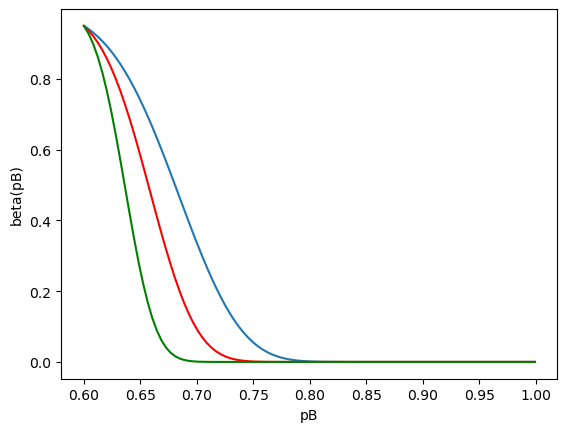

In [2]:
# Hva skjer med beta(pB) hvis vi øker antall observasjoner?

plt.plot(pB,beta)
plt.xlabel('pB')
plt.ylabel('beta(pB)')


n = 200
beta = norm.cdf((zAlpha*np.sqrt(0.24*n) + (0.6-pB)*n)/np.sqrt(n*pB*(1-pB))) # Sannsynligheten for type II-feil

plt.plot(pB,beta,'r') # Plotter beta når n=200 med rød kurve


n = 500
beta = norm.cdf((zAlpha*np.sqrt(0.24*n) + (0.6-pB)*n)/np.sqrt(n*pB*(1-pB))) # Sannsynligheten for type II-feil

plt.plot(pB,beta,'g') # Plotter beta når n=500 med grønn kurve

plt.show()

## Eksempel med t- og fortegnstest

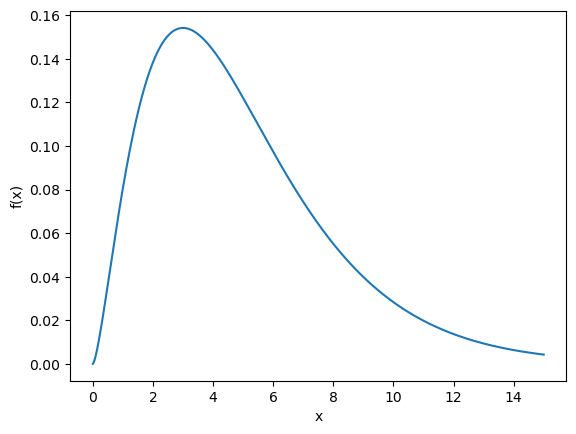

Estimert sannsynlighet for type I-feil:  0.01827


In [51]:
from scipy.stats import t
from scipy.stats import chi2

## Estimerer sannsynligheten for type I-feil i t-testen når X'ene er kjikvadratfordelt

n = 15 # antall X_i'er
nu = 5 # definer verdien til parameteren i kjikvadratfordelingen
median = chi2.ppf(0.5,nu) # finn medianen (0.5/kvantilen) i kjikvadratfordelinga
m = 100000 # antall simuleringer
alpha = 0.05 # nominelt signifikansnivå
tAlpha = t.ppf(1-alpha,n-1) # kritisk verdi fra t-fordeling med n-1 frihetsgrader

nForkast = 0 # skal brukes til å telle opp antall ganger H_0 forkastes
for j in np.arange(m):
    xSim = chi2.rvs(nu,size=n) # simulerer x-verdier
    xStrek = np.mean(xSim) # finner xStrek
    s = np.std(xSim,ddof=1) # finner empirisk standardavvik s, merk ddof=1 for at man skal dele på (n-1) og ikke n
    tt = (xStrek-median)/np.sqrt(s*s/n)
    if tt <= - tAlpha:
        nForkast = nForkast + 1

# plotter sannsynlighetstettheten til kjikvadratfordelingen vi simulerer X_i'ene fra

u = np.linspace(0.0,3*nu,500)  
ff = chi2.pdf(u,nu)
plt.plot(u,ff)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()
        
    
# estimert sannsynlighet for type I-feil    
print('Estimert sannsynlighet for type I-feil: ',nForkast / m)

In [52]:
## Estimerer sannsynlighetene for type II-feil når mu_0 = 10, sann mu = 9.5 og sigma = 1

In [55]:
from scipy.stats import norm

sigma = 1
mu0 = 10
mu = 9.5

n = 15
alpha = 0.05 # definerer signifikansnivået
tAlpha = t.ppf(1-alpha,n-1) # kritisk verdi fra t-fordeling med n-1 frihetsgrader
zAlpha = norm.ppf(1-alpha) # kritisk verdi fra standard normalfordeling

m = 1000
nForkastT = 0
nForkastFortegn = 0

for j in np.arange(m):
    xSim = norm.rvs(loc=mu,scale=sigma,size=n)
    xStrek = np.mean(xSim) # finner xStrek
    s = np.std(xSim,ddof=1) # finner empirisk standardavvik s, merk ddof=1 for at man skal dele på (n-1) og ikke n
    tt = (xStrek-mu0)/np.sqrt(s*s/n)
    if tt <= - tAlpha:
        nForkastT = nForkastT + 1
        
    u = sum(xSim < mu0)
    v = (u - 0.5*n)/np.sqrt(0.25*n)
    if v >= zAlpha:
        nForkastFortegn = nForkastFortegn + 1
        
print('Estimert sannsynlighet for type II-feil i T-test: ',1-nForkastT/m)
print('Estimert sannsynlighet for type II-feil i fortegnstest: ',1-nForkastFortegn/m)


Estimert sannsynlighet for type II-feil i T-test:  0.42900000000000005
Estimert sannsynlighet for type II-feil i fortegnstest:  0.513
